<a href="https://colab.research.google.com/github/rudraxx/pytorch/blob/main/03_mnist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MNIST example

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

from torchvision import datasets, transforms
import matplotlib.pyplot as plt

import torch.optim as optim



In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cuda device


In [ ]:
# Define the Model class

class NeuralNetwork(nn.Module):
  def __init__(self, ) -> None:
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,10)
    )

    self.softMax = nn.Softmax(dim=1)

  def forward(self, x):
    # Forward pass
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits



In [ ]:
# Instantiate the model
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
  (softMax): Softmax(dim=1)
)


In [ ]:
# Test the model

x = torch.randn([3, 28, 28], device=device)

logits = model(x)
print(logits)
pred_probab = model.softMax(logits)
print(pred_probab)

print(x.shape, logits.shape, pred_probab.shape)

tensor([[ 0.0484,  0.1676, -0.1232, -0.0310, -0.0475,  0.0067, -0.1264,  0.1924,
          0.0029, -0.1196],
        [-0.0040,  0.1907, -0.0599,  0.0267, -0.1321, -0.0703, -0.1922,  0.0433,
          0.1111, -0.1440],
        [ 0.0394,  0.1104, -0.0876, -0.0834, -0.0200,  0.0520, -0.1261,  0.0453,
         -0.0517, -0.0497]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.1047, 0.1179, 0.0881, 0.0967, 0.0951, 0.1004, 0.0879, 0.1209, 0.1000,
         0.0885],
        [0.1013, 0.1230, 0.0958, 0.1044, 0.0891, 0.0948, 0.0839, 0.1062, 0.1136,
         0.0880],
        [0.1055, 0.1133, 0.0930, 0.0933, 0.0995, 0.1069, 0.0894, 0.1062, 0.0964,
         0.0965]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
torch.Size([3, 28, 28]) torch.Size([3, 10]) torch.Size([3, 10])


In [ ]:
# Display the Model parameters

print(f"Model structure: {model}")
# for name, param in model.named_parameters():
#   print(name, param)

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
  (softMax): Softmax(dim=1)
)


In [ ]:
# Load the data
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

# Train/ Val split
train_size = int(0.8 * len(training_data))
val_size = len(training_data) - train_size

train_subset, val_subset = torch.utils.data.random_split(
        training_data, [train_size, val_size], generator=torch.Generator().manual_seed(1))


print(f"train_subset size: {len(train_subset)}, val_subset size: {len(val_subset)}")

train_subset size: 48000, val_subset size: 12000


In [ ]:
# Get the label map
print(training_data.data.shape)
img, label = training_data[0]
print(label)
print(training_data.classes)

torch.Size([60000, 28, 28])
9
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
label_map = {i:val for i, val in enumerate(training_data.classes)}
print(label_map)

# labels_map = {
#     0: "T-Shirt",
#     1: "Trouser",
#     2: "Pullover",
#     3: "Dress",
#     4: "Coat",
#     5: "Sandal",
#     6: "Shirt",
#     7: "Sneaker",
#     8: "Bag",
#     9: "Ankle Boot",
# }

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


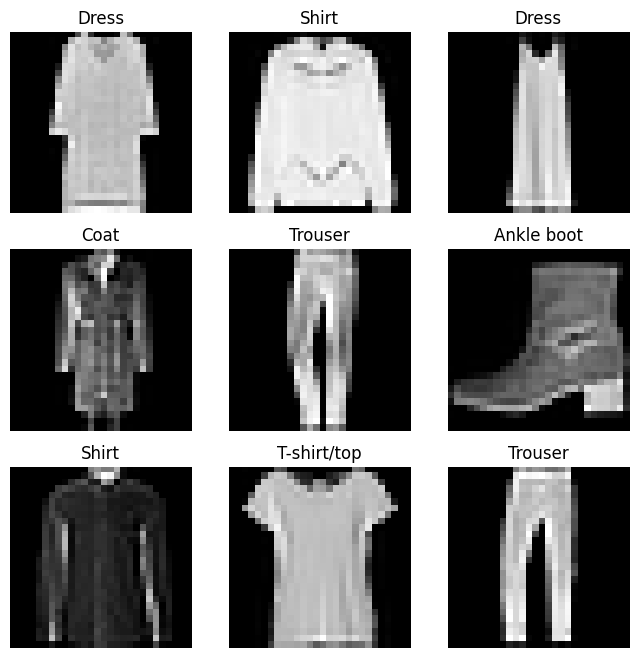

In [ ]:
# Show the data

figure = plt.figure(figsize=(8,8))
cols, rows= 3, 3

for i in range(1, cols*rows+1):
  # print(i)
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]

  # print(img.shape)

  figure.add_subplot(rows, cols, i)
  plt.title(label_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap='gray')

plt.show()


# # figure = plt.figure(figsize=(8, 8))
# # cols, rows = 3, 3
# for i in range(1, cols * rows + 1):
#     sample_idx = torch.randint(len(training_data), size=(1,)).item()
#     img, label = training_data[sample_idx]
#     figure.add_subplot(rows, cols, i)
#     plt.title(label_map[label])
#     plt.axis("off")
#     plt.imshow(img.squeeze(), cmap="gray")
# plt.show()

In [ ]:
#DataLoaders for training
BATCH_SIZE = 64

train_dataloader = DataLoader(dataset=train_subset, shuffle=True, batch_size=BATCH_SIZE)
val_dataloader = DataLoader(dataset=val_subset, shuffle=False, batch_size=val_size)

# train_dataloader = DataLoader(training_data,batch_size=64, shuffle=True)
test_dataloader  = DataLoader(test_data,batch_size=64, shuffle=True)

# print(type(train_dataloader))
#Iterate through dataloader
train_features, train_labels = next(iter(train_dataloader))
print(f"Train Feature batch shape : {train_features.shape}")
print(f"Train Label batch shape : {train_labels.shape}")

val_features, val_labels = next(iter(val_dataloader))
print(f"Val Feature batch shape : {val_features.shape}")
print(f"Val Label batch shape : {val_labels.shape}")


Train Feature batch shape : torch.Size([64, 1, 28, 28])
Train Label batch shape : torch.Size([64])
Val Feature batch shape : torch.Size([12000, 1, 28, 28])
Val Label batch shape : torch.Size([12000])


In [ ]:
#Hyperparameters

lr = 0.001
momentum = 0.9
epochs = 5


In [ ]:
# Define loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = lr, momentum=momentum)


In [ ]:
# Test the processing of val data
# val_data = val_dataloader.dataset.dataset.data.to(device=device)
# val_targets = val_dataloader.dataset.dataset.targets.to(device=device)
# val_preds    = model(val_data.to(device=device))
# val_loss = criterion(val_preds, val_targets.to(device=device))

# val_features, val_labels = next(iter(val_dataloader))
# val_preds    = model(val_features.to(device=device))
# print(val_preds.shape, val_preds.device)

# print(train_dataloader.dataset.dataset.data.shape)
# print(val_data.shape)


torch.Size([12000, 10]) cuda:0


In [ ]:
#Train
array_loss_values = []
array_val_loss_values = []

for epoch in range(epochs):

  running_loss = 0.0
  iCount = 0
  for i, data in enumerate(train_dataloader, 0):

    inputs, labels = data
    # print(f"Running epochs: {epoch}, iter:{i}",  inputs.shape, labels.shape)

    # iCount+=1

    # if iCount==1:
    #   break


    #Zero the gradients
    optimizer.zero_grad()

    #Forward pass
    out = model(inputs.to(device=device))

    #Calculate Loss
    loss = criterion(out, labels.to(device=device))


    #Calculate the gradients
    loss.backward()

    #Apply the gradients
    optimizer.step()

    #Print stats

    running_loss += loss.item()
    # print(running_loss)
    # break

    # num_print_loop = 100.
    # if i % num_print_loop == num_print_loop-1: # Print every 100th minibatch
    #   avg_loss = running_loss/num_print_loop
    #   print(f"[{epoch+1}, {i+1:5d}] loss : {avg_loss:.3f}")

      # running_loss = 0.0


  #Save the epoch loss
  avg_epoch_loss      = running_loss/len(train_dataloader)

  # Get Validation loss
  val_features, val_labels = next(iter(val_dataloader))
  # val_data = val_dataloader.dataset.dataset.data
  # val_targets = val_dataloader.dataset.dataset.targets
  val_preds    = model(val_features.to(device=device))
  val_loss = criterion(val_preds, val_labels.to(device=device))
  # running_val_loss += val_loss.item()

  avg_epoch_val_loss  = val_loss.item()/len(val_dataloader)

  #Append to lists
  array_loss_values.append(avg_epoch_loss)
  array_val_loss_values.append(avg_epoch_val_loss)


  print(f"[{epoch+1}, {i+1:5d}] training loss : {avg_epoch_loss:.3f} val loss : {avg_epoch_val_loss:.3f}")
  running_loss=0.0

print("Finished Training")






[1,   750] training loss : 0.493 val loss : 0.485
[2,   750] training loss : 0.472 val loss : 0.468
[3,   750] training loss : 0.457 val loss : 0.454
[4,   750] training loss : 0.444 val loss : 0.445
[5,   750] training loss : 0.435 val loss : 0.465
Finished Training


In [ ]:
print(array_loss_values)
print(array_val_loss_values)


[0.49340104873975116, 0.47185911134878794, 0.45698060993353523, 0.44421790313720705, 0.43534090115626656]
[0.4854738712310791, 0.46800363063812256, 0.4538443088531494, 0.44538336992263794, 0.46535417437553406]


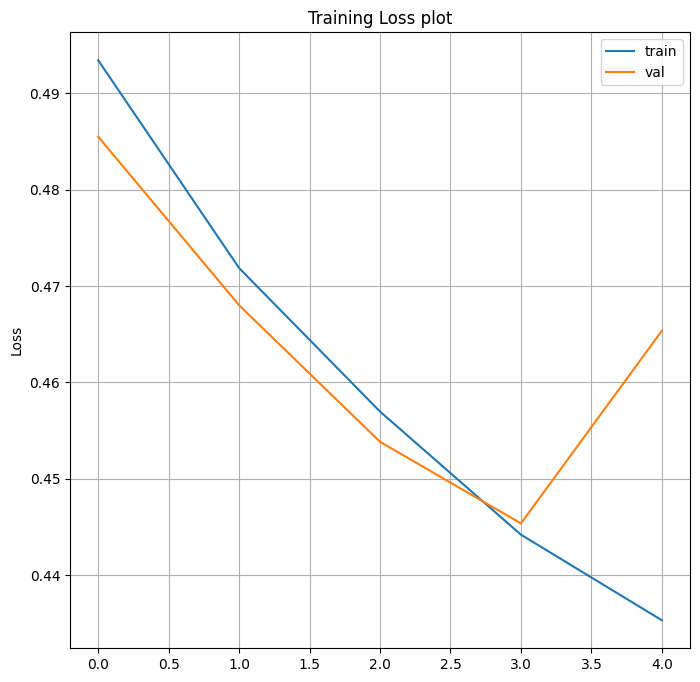

In [ ]:
plt.figure(figsize=(8,8))

plt.plot(array_loss_values, label = "train")
plt.plot(array_val_loss_values, label = "val")
plt.xlabel("")
plt.ylabel("Loss")
plt.title("Training Loss plot")
plt.legend()
plt.grid(True)
